<a href="https://colab.research.google.com/github/anujatayal/Colab-Notebooks/blob/main/BN_test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
tf.__version__
import glob
import imageio
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
from tensorflow.keras import layers
import time

from IPython import display

In [ ]:
(train_images, train_labels), (_, _) = tf.keras.datasets.mnist.load_data()
train_images = train_images.reshape(train_images.shape[0], 28, 28, 1).astype('float32')
train_images = (train_images - 127.5) / 127.5 # Normalize the images to [-1, 1]

In [ ]:
train_dataset = tf.data.Dataset.from_tensor_slices(train_images).shuffle(BUFFER_SIZE).batch(BATCH_SIZE)


In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
plt.style.use('dark_background')
from keras.models import Sequential
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import BatchNormalization
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten
from keras.datasets import cifar10
from keras.utils import normalize, to_categorical

In [ ]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()
X_train = normalize(X_train, axis=1)
X_test = normalize(X_test, axis=1)
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

170500096/170498071 [==============================] - 4s 0us/step


In [ ]:
train_datagen = ImageDataGenerator(
    shear_range = 0.2,
    zoom_range = 0.2,
    horizontal_flip = True
)
train_datagen.fit(X_train)
train_generator = train_datagen.flow(
    X_train,
    y_train,
    batch_size = 32
)

In [ ]:
steps = int(X_train.shape[0] / 64)


In [ ]:
def build_model(batch_normalization, activation):
    model = Sequential()
    model.add(Conv2D(32, 3, activation = activation, padding = 'same', input_shape = (32, 32, 3)))
    if batch_normalization: model.add(BatchNormalization())
    model.add(Conv2D(32, 3, activation = activation, padding = 'same', kernel_initializer = 'he_uniform'))
    if batch_normalization: model.add(BatchNormalization())
    model.add(MaxPooling2D())
    model.add(Conv2D(64, 3, activation = activation, padding = 'same', kernel_initializer = 'he_uniform'))
    if batch_normalization: model.add(BatchNormalization())
    model.add(Conv2D(64, 3, activation = activation, padding = 'same', kernel_initializer = 'he_uniform'))
    if batch_normalization: model.add(BatchNormalization()) 
    model.add(MaxPooling2D())
    model.add(Flatten())
    model.add(Dense(128, activation = activation, kernel_initializer = 'he_uniform'))
    model.add(Dense(10, activation = 'softmax'))
    return model

In [ ]:
sig_model = build_model(batch_normalization = True, activation = 'relu')

In [ ]:
sig_model.compile(
    optimizer = 'rmsprop',
    loss = 'categorical_crossentropy',
    metrics = ['accuracy']
)

In [ ]:
sig_history = sig_model.fit_generator(
        train_generator,
        steps_per_epoch = steps,
        epochs = 10,
        validation_data = (X_test, y_test)
)

Epoch 1/10
781/781 [==============================] - 14s 19ms/step - loss: 1.6497 - accuracy: 0.4367 - val_loss: 1.4280 - val_accuracy: 0.4914
Epoch 2/10
781/781 [==============================] - 14s 18ms/step - loss: 1.2050 - accuracy: 0.5837 - val_loss: 1.4248 - val_accuracy: 0.5600
Epoch 3/10
781/781 [==============================] - 14s 18ms/step - loss: 1.0516 - accuracy: 0.6402 - val_loss: 1.6557 - val_accuracy: 0.5550
Epoch 4/10
781/781 [==============================] - 14s 18ms/step - loss: 0.9854 - accuracy: 0.6620 - val_loss: 1.4583 - val_accuracy: 0.5523
Epoch 5/10
781/781 [==============================] - 14s 18ms/step - loss: 0.9222 - accuracy: 0.6868 - val_loss: 1.2616 - val_accuracy: 0.5979
Epoch 6/10
781/781 [==============================] - 14s 18ms/step - loss: 0.8852 - accuracy: 0.6987 - val_loss: 1.3785 - val_accuracy: 0.5992
Epoch 7/10
781/781 [==============================] - 14s 18ms/step - loss: 0.8506 - accuracy: 0.7108 - val_loss: 1.1331 - val_accuracy:

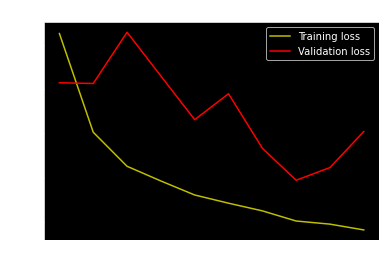

In [ ]:
loss = sig_history.history['loss']
val_loss = sig_history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

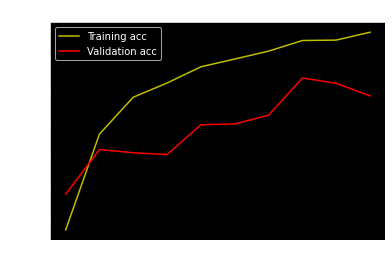

In [ ]:


acc = sig_history.history['accuracy']
val_acc = sig_history.history['val_accuracy']
plt.plot(epochs, acc, 'y', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()